Topic: Project 2  
Subject: Linear Regression  
Date: 01/27/2020  
Name: Ake Paramadilok

# Imports

In [2]:
import pandas as pd
import pickle
import PGA_Linear_Regression as pga
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
%config InlineBackend.figure_formats = ['retina']
import numpy as np
import statsmodels.api as sm
from statsmodels.tools import add_constant
import statsmodels.formula.api as smf
import patsy
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics
import math
import pprint
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from collections import defaultdict

Populating the interactive namespace from numpy and matplotlib


In [3]:
clean_data = pd.read_csv('full_dataset_percentage_win.csv')

# Correlation Analysis

## Correlation with Next Season's Percentage of Winning Points

In [4]:
clean_data.corr().NEXT_PERCENTAGE_OF_WINNING_PTS.sort_values(ascending = False)

NEXT_PERCENTAGE_OF_WINNING_PTS           1.000000
PERCENTAGE_OF_WINNING_PTS                0.503479
FEDEX_REGULAR_SEASON_POINTS              0.502598
BIRDIE_OR_BETTER_PERCENTAGE              0.424273
BIRDIE_AVE                               0.414315
BIRDIE_OR_BETTER_PERCENTAGE_FAIRWAY      0.393004
BIRDIE_OR_BETTER_CONVESION_PERCENTAGE    0.331468
BIRDIE_OR_BETTER_PERCENTAGE_ROUGH        0.264370
FINAL_ROUND_PERFORMANCE                  0.244025
GREENS_IN_REGULATION_PERCENTAGE          0.242312
CLUB_HEAD_SPEED                          0.218975
DRIVING_DISTANCE                         0.216667
BOUNCE_BACK                              0.191161
SAND_SAVE_PERCENTAGE                     0.122598
PUTTING_FROM_10_15ft                     0.104666
PUTTING_FROM_20_25ft                     0.097035
PUTTING_INSIDE_10ft                      0.094258
PUTTING_FROM_15_20ft                     0.070067
PUTTING_FROM_25ft_plus                   0.068156
DRIVING_ACCURACY_PERCENTAGE             -0.001791


## Heat Map

In [7]:
corr = clean_data.corr()

plt.figure(figsize = (80,80))
ax = sns.heatmap(corr,
                     vmin = -1, 
                     vmax = 1, 
                     center = 0,
                     cmap = sns.diverging_palette(20,220,n=200),
                     square = True,
                     annot = True)
ax.set_xticklabels(ax.get_xticklabels(),
                       rotation = 45,
                       horizontalalignment = 'right');
figure = ax.get_figure()    
figure.savefig('heatmap.png', dpi=400)

## Pair Plot

In [1]:
# sns_plot = sns.pairplot(clean_data, height=1.2, aspect=1.5);
# sns_plot.savefig('heatmap.png', dpi=400)

# Evaluation of Target (Next Season % of Points Won)

## Description of Next Season % Points Won

In [9]:
clean_data['NEXT_PERCENTAGE_OF_WINNING_PTS'].describe()

count    1228.000000
mean        0.256009
std         0.180263
min         0.003137
25%         0.132063
50%         0.210920
75%         0.322609
max         1.000000
Name: NEXT_PERCENTAGE_OF_WINNING_PTS, dtype: float64

## Check Distribution of Target (Next Season % of Points Won)

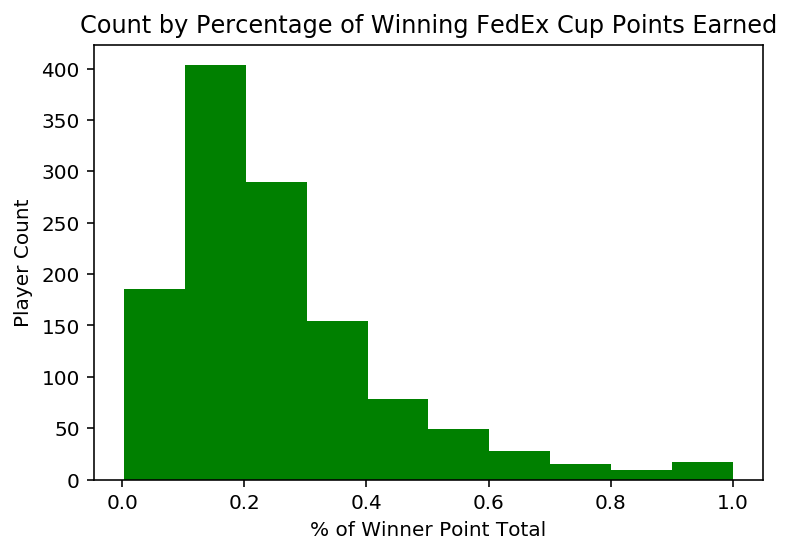

In [10]:
plt.hist(clean_data['NEXT_PERCENTAGE_OF_WINNING_PTS'],color = 'green')
plt.title('Count by Percentage of Winning FedEx Cup Points Earned')
plt.xlabel('% of Winner Point Total')
plt.ylabel('Player Count')
 
plt.savefig('y_hist.png', dpi=400)

## Check Distribution of log (Target)


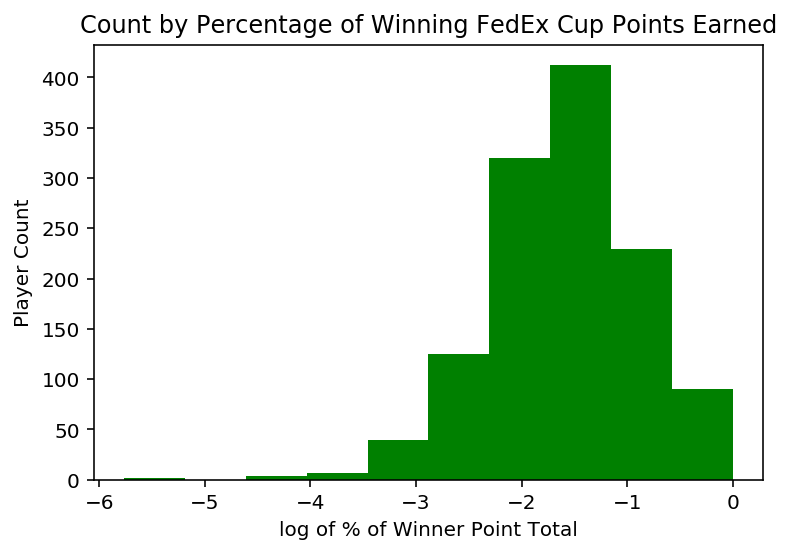

In [11]:
plt.hist(log(clean_data['NEXT_PERCENTAGE_OF_WINNING_PTS']),color = 'green')
plt.title('Count by Percentage of Winning FedEx Cup Points Earned')
plt.xlabel('log of % of Winner Point Total')
plt.ylabel('Player Count')
 
plt.savefig('y_hist_log.png', dpi=400)